HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

How will you help this NGO to make a correct decision based on socio-economic and health factors?


In [62]:
#import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [63]:
#load dataset

data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [42]:
data.shape


(167, 10)

In [43]:
%whos

Variable           Type         Data/Info
-----------------------------------------
FinalListbyKMean   DataFrame         child_mort  exports <...>00        2           2  
KMeans             type         <class 'sklearn.cluster._kmeans.KMeans'>
PCA                ABCMeta      <class 'sklearn.decomposition._pca.PCA'>
StandardScaler     type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
cluster            KMeans       KMeans(max_iter=150, n_cl<...>sters=3, random_state=50)
counts             ndarray      6: 6 elems, type `int64`, 48 bytes
data               DataFrame                     country <...>\n[167 rows x 10 columns]
i                  int          19
kmeans             KMeans       KMeans(n_clusters=3, random_state=42)
np                 module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pca                PCA          PCA(random_state=42, svd_solver='randomized')
pd                 module       <module 'pandas' from 'C:<...>es\\pandas\\__init

In [44]:
data.dtypes


country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [45]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

The dataset contain 167 rows and 10 columns.There is no missing values.

In [67]:
x = data.drop('country', axis=1)

In [86]:
#processing

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.127373e-17,1.229888e-17,2.160614e-17,-1.861452e-17,-1.529050e-17,-7.312846e-18,-3.191060e-17,-1.329608e-18,-2.260334e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


Finding optimal number of clusters 

C:\Users\Seethal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1503.0000000000002
1050.2145582853307
831.424435208687
700.3229986404373
620.163371288842
571.9992966496745
495.3233825951917
455.27682760469946
426.45844564714764
396.25069895342983


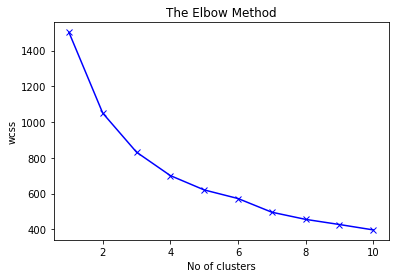

In [84]:
#KMeans Clustering

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [51]:
#K-Means

kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [88]:
data['cluster']=y_kmeans

In [89]:
data['Cluster_Id'] = cluster.labels_
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Cluster_Id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2


In [55]:
# Number of countries in each cluster
data.Cluster_Id.value_counts(ascending=True)

0    36
1    47
2    84
Name: Cluster_Id, dtype: int64

In [77]:
data[['gdpp','income','child_mort','Cluster_Id']].groupby('Cluster_Id').mean()

,gdpp,income,child_mort
Cluster_Id,,,
0,42494.444444,45672.222222,5.000000
1,1922.382979,3942.404255,92.961702
2,6486.452381,12305.595238,21.927381


In [78]:
data[data['Cluster_Id']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Cluster_Id
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500,0,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300,0,0
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,0,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700,0,0
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.50,76.5,1.87,35000,0,0


In [79]:
data[data['Cluster_Id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Cluster_Id
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1,1
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1,1
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1,1
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1,1


In [80]:
data[data['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Cluster_Id
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988,2,2
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440,2,2
69,India,58.8,22.600,4.05,27.1000,4410,8.98,66.2,2.60,1350,2,2
146,Tajikistan,52.4,14.900,5.98,58.6000,2110,12.50,69.6,3.51,738,2,2
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.14,70.4,2.33,758,2,2


Final List of countries which are in need of the aid based on socio-economic factors.

In [83]:
FinalListbyKMean=data[data['Cluster_Id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True])
FinalListbyKMean['country']
FinalListbyKMean.reset_index(drop=True).country[:]

0                        Haiti
1                 Sierra Leone
2                         Chad
3     Central African Republic
4                         Mali
5                      Nigeria
6                        Niger
7                       Angola
8             Congo, Dem. Rep.
9                 Burkina Faso
10               Guinea-Bissau
11                       Benin
12               Cote d'Ivoire
13           Equatorial Guinea
14                      Guinea
15                    Cameroon
16                  Mozambique
17                     Lesotho
18                  Mauritania
19                     Burundi
20                    Pakistan
21                      Malawi
22                        Togo
23                 Afghanistan
24                     Liberia
25                     Comoros
26                      Zambia
27                      Uganda
28                      Gambia
29                         Lao
30                       Sudan
31                       Ghana
32      

By considering socio-ecnomic factors like income,child_mort,gdpp,etc cluster1 has 47 countries that are in the financial of aid from HELP.